##   Packt Computer Vision with Python3 - Digit Recognition

In [1]:
# import Liraries
import numpy as np
import matplotlib.pyplot as plt
import sys
import tempfile

from sklearn import  svm, metrics
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data

C:\Users\amira\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


<class 'numpy.ndarray'>


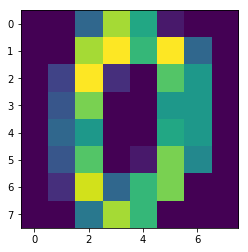

array([[ 0.],
       [ 0.],
       [ 5.],
       [13.],
       [ 9.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [13.],
       [15.],
       [10.],
       [15.],
       [ 5.],
       [ 0.],
       [ 0.],
       [ 3.],
       [15.],
       [ 2.],
       [ 0.],
       [11.],
       [ 8.],
       [ 0.],
       [ 0.],
       [ 4.],
       [12.],
       [ 0.],
       [ 0.],
       [ 8.],
       [ 8.],
       [ 0.],
       [ 0.],
       [ 5.],
       [ 8.],
       [ 0.],
       [ 0.],
       [ 9.],
       [ 8.],
       [ 0.],
       [ 0.],
       [ 4.],
       [11.],
       [ 0.],
       [ 1.],
       [12.],
       [ 7.],
       [ 0.],
       [ 0.],
       [ 2.],
       [14.],
       [ 5.],
       [10.],
       [12.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 6.],
       [13.],
       [10.],
       [ 0.],
       [ 0.],
       [ 0.]])

In [2]:
#what kind of data do we already have?
from sklearn import datasets
digits=datasets.load_digits()


example_image=digits.images[0]
print(type(example_image))
plt.imshow(example_image); plt.show()
example_image.reshape((8*8,1))

In [3]:
#acquire standard MNIST handwritten digit data
#http://yann.lecun.com/exdb/mnist/

data_dir = '/tmp/tensorflow/mnist/input_data'
mnist = input_data.read_data_sets(data_dir, one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/tensorflow/mnist/input_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/tensorflow/mnist/input_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/tensorflow/mnist/input_data\t10k-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


(55000, 784)


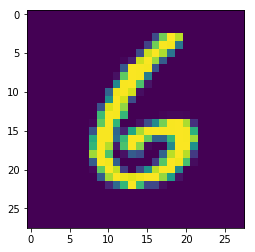

In [4]:
#now we load and examine the data
train_data=mnist.train.images
print(train_data.shape)
n_samples = train_data.shape[0]


train_labels=np.array(np.where(mnist.train.labels==1))[1]

plt.imshow(train_data[1000].reshape((28,28))); plt.show()

In [ ]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)
# Learn about gamma and other SVM parameters here:
# http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html
# Exercise:  Experiment with the parameters to see how they affect execution 
#             time and accuracy

# Train the model -- we're only going to use the training data (and not
# the test data) to ensure that our model generalizes to unseen cases.
# This (training) is typically what takes the most computational time
# when doing machine learning.
classifier.fit(train_data, train_labels)

In [ ]:
# Now predict the value of the digit on the test data:
test_data=mnist.test.images
test_labels=np.array(np.where(mnist.test.labels==1))[1]

expected = test_labels
predicted = classifier.predict(test_data)

In [ ]:
# And display the results
print("See https://en.wikipedia.org/wiki/Precision_and_recall to understand metric definitions")
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(test_data, predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image.reshape((28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

In [ ]:
:
#Let's test our model on images we draw ourselves!

from matplotlib.lines import Line2D
%pylab notebook 
#This is needed for plot widgets

class Annotator(object):
    def __init__(self, axes):
        self.axes = axes

        self.xdata = []
        self.ydata = []
        self.xy    = []
        self.drawon = False

    def mouse_move(self, event):
        if not event.inaxes:
            return

        x, y = event.xdata, event.ydata
        if self.drawon:
            self.xdata.append(x)
            self.ydata.append(y)
            self.xy.append((int(x),int(y)))
            line = Line2D(self.xdata,self.ydata)
            line.set_color('r')
            self.axes.add_line(line)

            plt.draw()

    def mouse_release(self, event):
        # Erase x and y data for new line
        self.xdata = []
        self.ydata = []
        self.drawon = False
        
    def mouse_press(self, event):
        self.drawon = True


img = np.zeros((28,28,3),dtype='uint8')

fig, axes = plt.subplots(figsize=(3,3))
axes.imshow(img)
plt.axis("off")
plt.gray()
annotator = Annotator(axes)
plt.connect('motion_notify_event', annotator.mouse_move)
plt.connect('button_release_event', annotator.mouse_release)
plt.connect('button_press_event', annotator.mouse_press)

axes.plot()

plt.show()